# Определение перспективного тарифа для телеком-компании

Цель проекта - сделать предварительный анализ тарифов на небольшой выборке клиентов 500 человек. Проанализировать поведение клиентов и сделать вывод — какой тариф лучше

| Название проекта | Описание | Используемые библиотеки | 
| :---------------------- | :---------------------- | :---------------------- |
| [Финальный проект по A\B тестированию](AB_test) | Проверить корректность проведения A\B теста| *pandas*, *numpy*, *scipy*, *seaborn*|
| [Финальный проект по анализу данных](Final_project)| Сформировать модель монетизации игрового приложения основанную на рекламе во время игрового события. Проверка статистических гипотез.| *pandas*, *numpy*, *scipy*, *seaborn*|
| [Анализ рынка видеоигр](Games_analysis) | Провести анализ рынка видеоигр, различных игровых платформ, с целью предсказания закономерностей на след. год.| *pandas*, *numpy*, *scipy*, *seaborn*|
| [Основы машинного обучения](ML_basics) |Формирование плана действий по удержанию клиентов| *pandas*, *numpy*, *scipy*, *sklearn*, *seaborn*|
| [Парсер вакансий](Parsing_homework) |Разработать механизм парсинга вакансий из телеграм каналов| *pandas*, *numpy*, *matplotlib*, *Scrapy*|
| [Робо-кафе](Preprocessing) |Анализ открытых данных заведений общественного питания Москвы| *pandas*, *numpy*, *seaborn*|
| [Мегалайн](Statistic_analysis) | Определение перспективного тарифа для телеком-компании. Проверка статистических гипотез.| *pandas*, *numpy*, *scipy*, *seaborn*|

## Изучение данных

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import scipy.stats as st

In [2]:
calls_data = pd.read_csv('/datasets/calls.csv')
internet_data = pd.read_csv('/datasets/internet.csv')
messages_data = pd.read_csv('/datasets/messages.csv')
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
users_data = pd.read_csv('/datasets/users.csv')

### Звонки

In [3]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls_data['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [5]:
calls_data.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
calls_data.call_date.nunique()

365

In [7]:
calls_data.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


### Интернет трафик

In [8]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
internet_data.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [10]:
internet_data.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


### Смс сообщения

### Смс сообщения

In [11]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
messages_data.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


### Тарифы

In [13]:
tariffs_data.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Пользователи

In [14]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [15]:
users_data.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
408,1408,53,NaN,Самара,Касьян,Кукушкин,2018-05-27,smart
132,1132,24,NaN,Москва,Маргарита,Алехина,2018-09-01,smart
195,1195,19,NaN,Москва,Веселина,Петухова,2018-10-14,smart
54,1054,33,NaN,Омск,Кристина,Платонова,2018-03-20,smart
481,1481,70,NaN,Москва,Клавдия,Чижова,2018-02-26,smart
358,1358,64,NaN,Ставрополь,Демьян,Логинов,2018-02-21,smart
406,1406,68,NaN,Казань,Станислав,Семёнов,2018-12-15,smart
208,1208,69,NaN,Пермь,Ева,Сахарова,2018-03-24,ultra
91,1091,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra
119,1119,53,NaN,Петрозаводск,Олег,Сухарев,2018-04-22,smart


In [16]:
pd.set_option('max_rows', 100)
display(users_data['city'].value_counts())
pd.reset_option('max_rows')

Москва              99
Санкт-Петербург     39
Новосибирск         16
Омск                14
Казань              14
Уфа                 12
Ульяновск           11
Набережные Челны    11
Екатеринбург        11
Краснодар           11
Самара               9
Челябинск            9
Пермь                8
Нижний Новгород      8
Волгоград            8
Красноярск           7
Улан-Удэ             7
Новокузнецк          7
Вологда              7
Воронеж              6
Тюмень               6
Пенза                6
Томск                6
Киров                6
Ростов-на-Дону       6
Иркутск              6
Сочи                 6
Ставрополь           5
Балашиха             5
Магнитогорск         5
Махачкала            5
Владивосток          5
Кострома             4
Рязань               4
Астрахань            4
Петрозаводск         4
Чита                 4
Саранск              4
Тольятти             4
Хабаровск            4
Новороссийск         4
Мурманск             4
Калуга               4
Чебоксары  

In [17]:
users_data[users_data[users_data.columns.drop(['user_id', 'tariff', 'churn_date', 'reg_date',])].duplicated() == True]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


In [18]:
users_data[users_data.columns.drop(['user_id', 'tariff', 'churn_date', 'reg_date'])]

,age,city,first_name,last_name
0,52,Краснодар,Рафаил,Верещагин
1,41,Москва,Иван,Ежов
2,59,Стерлитамак,Евгений,Абрамович
3,23,Москва,Белла,Белякова
4,68,Новокузнецк,Татьяна,Авдеенко
...,...,...,...,...
495,65,Иркутск,Авксентий,Фокин
496,36,Вологда,Трифон,Блохин
497,32,Челябинск,Каролина,Агеева
498,68,Владикавказ,Всеволод,Акимчин


Дубликатов на уровне фио, город, возраст, нет.

## Предобработка данных

### Звонки

In [19]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'])

Округление звонков

In [20]:
calls_data['duration'] = np.ceil(calls_data['duration']).astype('int')

In [21]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


Расчет по месяцам

In [22]:
calls_monthly = (calls_data
                 .groupby(['user_id', calls_data['call_date'].dt.month])
                 .agg({'duration':['sum', 'count']})
                 .reset_index()
                )

In [23]:
calls_monthly.columns = ['user_id', 'month','minutes', 'calls_count']

In [24]:
calls_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      3174 non-null   int64
 1   month        3174 non-null   int64
 2   minutes      3174 non-null   int64
 3   calls_count  3174 non-null   int64
dtypes: int64(4)
memory usage: 99.3 KB


In [25]:
calls_data['call_date'].dt.to_period('M')

0         2018-07
1         2018-08
2         2018-06
3         2018-09
4         2018-12
           ...   
202602    2018-12
202603    2018-10
202604    2018-11
202605    2018-10
202606    2018-12
Name: call_date, Length: 202607, dtype: period[M]

### Интернет трафик

In [26]:
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'])

In [27]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


Расчет по месяцам

In [28]:
internet_monthly = (internet_data
                    .groupby(['user_id', internet_data['session_date'].dt.month])
                    .agg({'mb_used':'sum'})
                    .reset_index()
                    .rename(columns={'session_date':'month'})
                   )

In [29]:
internet_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3203 non-null   int64  
 1   month    3203 non-null   int64  
 2   mb_used  3203 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


### Смс сообщения

In [30]:
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'])

In [31]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Расчет по месяцам

In [32]:
messages_monthly = (messages_data
                    .groupby(['user_id', messages_data['message_date'].dt.month])
                    .agg({'id':'count'})
                    .reset_index()
                    .rename(columns={'message_date':'month', 'id':'messages_count'})
                   )

In [33]:
messages_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         2717 non-null   int64
 1   month           2717 non-null   int64
 2   messages_count  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


### Пользователи

In [34]:
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'])

In [35]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [36]:
users_paid_monthly = users_data.merge(
    (calls_monthly
     .merge(internet_monthly, how='outer', on=['user_id', 'month'])
     .merge(messages_monthly, how='outer', on=['user_id', 'month'])
    ), how='left'
)

In [37]:
users_paid_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3216 non-null   int64         
 1   age             3216 non-null   int64         
 2   churn_date      189 non-null    object        
 3   city            3216 non-null   object        
 4   first_name      3216 non-null   object        
 5   last_name       3216 non-null   object        
 6   reg_date        3216 non-null   datetime64[ns]
 7   tariff          3216 non-null   object        
 8   month           3214 non-null   float64       
 9   minutes         3174 non-null   float64       
 10  calls_count     3174 non-null   float64       
 11  mb_used         3203 non-null   float64       
 12  messages_count  2717 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 351.8+ KB


In [38]:
users_paid_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3216 non-null   int64         
 1   age             3216 non-null   int64         
 2   churn_date      189 non-null    object        
 3   city            3216 non-null   object        
 4   first_name      3216 non-null   object        
 5   last_name       3216 non-null   object        
 6   reg_date        3216 non-null   datetime64[ns]
 7   tariff          3216 non-null   object        
 8   month           3214 non-null   float64       
 9   minutes         3174 non-null   float64       
 10  calls_count     3174 non-null   float64       
 11  mb_used         3203 non-null   float64       
 12  messages_count  2717 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 351.8+ KB


#### Обработка NA

Есть группа пользователей без информации о использовании тарифа.

In [39]:
(users_paid_monthly[
    users_paid_monthly[users_paid_monthly.columns.drop(['churn_date', 'messages_count'])]
    .isna().any(axis=1)]
)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,minutes,calls_count,mb_used,messages_count
570,1091,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,5.0,NaN,NaN,10703.37,30.0
571,1091,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,6.0,NaN,NaN,10236.19,30.0
572,1091,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,7.0,NaN,NaN,16444.98,35.0
573,1091,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,8.0,NaN,NaN,12633.88,31.0
574,1091,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,9.0,NaN,NaN,16597.11,32.0
575,1091,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,10.0,NaN,NaN,15644.73,44.0
576,1091,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,11.0,NaN,NaN,11864.25,28.0
577,1091,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,12.0,NaN,NaN,13280.45,42.0
671,1106,67,NaN,Калуга,Исаак,Костин,2018-04-26,ultra,4.0,NaN,NaN,2923.49,9.0
672,1106,67,NaN,Калуга,Исаак,Костин,2018-04-26,ultra,5.0,NaN,NaN,16573.01,28.0


In [40]:
nan_users = (users_paid_monthly[users_paid_monthly[['month', 'minutes', 'calls_count', 'mb_used', 'messages_count']]
                    .isna()
                    .all(axis=1)]
)
display(nan_users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,minutes,calls_count,mb_used,messages_count
827,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,NaN,NaN,NaN,NaN,NaN
2335,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,NaN,NaN,NaN,NaN,NaN


In [41]:
#users_paid_monthly[users_paid_monthly['user_id'].isin(nan_users['user_id'])]

Пользователи по активности которых нет никаких записей, пользователь 1128 неподходит по лайфтайму. Остальные зарегестрированы больше месяца, возможно какая то ошибка. При расчете эти пользователи мне не нужны так как нет информации по оплате.

Так же пользователем не пользовавшимся интернетом, сообщениями или звонками в каком либо месяце я ставлю 0 вместо na

In [42]:
users_paid_monthly['mb_used'].fillna(0, inplace=True)
users_paid_monthly['minutes'].fillna(0, inplace=True)
users_paid_monthly['messages_count'].fillna(0, inplace=True)
users_paid_monthly['calls_count'].fillna(0, inplace=True)

In [43]:
users_paid_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3216 non-null   int64         
 1   age             3216 non-null   int64         
 2   churn_date      189 non-null    object        
 3   city            3216 non-null   object        
 4   first_name      3216 non-null   object        
 5   last_name       3216 non-null   object        
 6   reg_date        3216 non-null   datetime64[ns]
 7   tariff          3216 non-null   object        
 8   month           3214 non-null   float64       
 9   minutes         3216 non-null   float64       
 10  calls_count     3216 non-null   float64       
 11  mb_used         3216 non-null   float64       
 12  messages_count  3216 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 351.8+ KB


#### Вычисление платы

In [44]:
def calc_paid_monthly(users, tariffs):
    
    tmp = users.iloc[:,[-1,-2,-4,-6]]
    paid = list()
    for index, row in tmp.iterrows():
        #Вычитаю предусмотренные тарифом величины и зануляю отрицательные значения row[3] название тарифа
        res = (row[[0,1,2]].values - tariffs.set_index('tariff_name').loc[row[3]].iloc[[0,1,2]].values).clip(min=0)
        #Округляю трафик в гигабайты
        res[1] =  int(np.ceil(np.true_divide(res[1],1024)))
        #Умножаю на стоимость избыточных ресурсов
        res = res.dot(tariffs.set_index('tariff_name').loc[row[3]].iloc[[-2,-3,-1]])
        #Месячная плата
        res+= tariffs.set_index('tariff_name').loc[row[3]]['rub_monthly_fee']
        paid.append(res)
    return paid

In [45]:
tmp_paid = users_paid_monthly.iloc[:,[-1,-2,-4,-6]].copy()

In [46]:
tmp_paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   messages_count  3216 non-null   float64
 1   mb_used         3216 non-null   float64
 2   minutes         3216 non-null   float64
 3   tariff          3216 non-null   object 
dtypes: float64(3), object(1)
memory usage: 125.6+ KB


In [47]:
tmp_paid.loc[tmp_paid['tariff'] == 'smart', ['messages_count','mb_used','minutes']] = (
    np.subtract(tmp_paid.loc[tmp_paid['tariff'] == 'smart', ['messages_count','mb_used','minutes']],
                tariffs_data.iloc[0,[0,1,2]].values)
)

In [48]:
tmp_paid.loc[tmp_paid['tariff'] == 'ultra', ['messages_count','mb_used','minutes']] = (
    np.subtract(tmp_paid.loc[tmp_paid['tariff'] == 'ultra', ['messages_count','mb_used','minutes']],
                tariffs_data.iloc[1,[0,1,2]].values)
)

In [49]:
tmp_paid.loc[:, ['messages_count','mb_used','minutes']] = np.clip(tmp_paid.loc[:, ['messages_count','mb_used','minutes']], 0, None)

In [50]:
tmp_paid['mb_used'] = np.ceil(np.true_divide(tmp_paid['mb_used'], 1024))

In [51]:
tmp_paid.loc[tmp_paid['tariff'] == 'smart', 'paid'] = (tmp_paid.loc[tmp_paid['tariff'] == 'smart', ['messages_count','mb_used','minutes']]
                    .dot(tariffs_data.iloc[0,[5,4,6]].values)
                    + tariffs_data.iloc[0, 3]
                   )

In [52]:
tmp_paid.loc[tmp_paid['tariff'] == 'ultra', 'paid']  = (tmp_paid.loc[tmp_paid['tariff'] == 'ultra', ['messages_count','mb_used','minutes']]
                    .dot(tariffs_data.iloc[1,[5,4,6]].values)
                    + tariffs_data.iloc[1, 3]
                   )

In [53]:
users_paid_monthly['paid'] = pd.to_numeric(tmp_paid['paid'])

In [54]:
#users_paid_monthly['paid'] = calc_paid_monthly(users_paid_monthly, tariffs_data)

In [55]:
users_paid_monthly

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,minutes,calls_count,mb_used,messages_count,paid
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0,2253.49,22.0,1950
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,43.0,23233.77,60.0,1950
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,47.0,14003.64,75.0,1950
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,52.0,14055.93,81.0,1950
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,58.0,14568.91,57.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,247.0,41.0,20579.36,42.0,1750
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,70.0,9.0,1845.75,11.0,550
3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,449.0,68.0,17788.51,48.0,1150
3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,612.0,74.0,17963.31,59.0,1513


## Анализ данных

In [56]:
users_tariff_limits_overwhelm = pd.DataFrame(0,index=['smart', 'ultra'], columns=['calls',  'traffic', 'messages'])

In [57]:
_,_,m,var,_,_= st.describe(users_paid_monthly[users_paid_monthly['tariff'] == 'smart']['minutes'])
print(f'Mean {m}, Variance {var**(1/2):.3f}')

Mean 417.747533632287, Variance 190.477


In [58]:
_,_,m,var,_,_= st.describe(users_paid_monthly[users_paid_monthly['tariff'] == 'ultra']['minutes'])
print(f'Mean {m}, Variance {var**(1/2):.3f}')

Mean 526.0892494929006, Variance 317.888


### Звонки

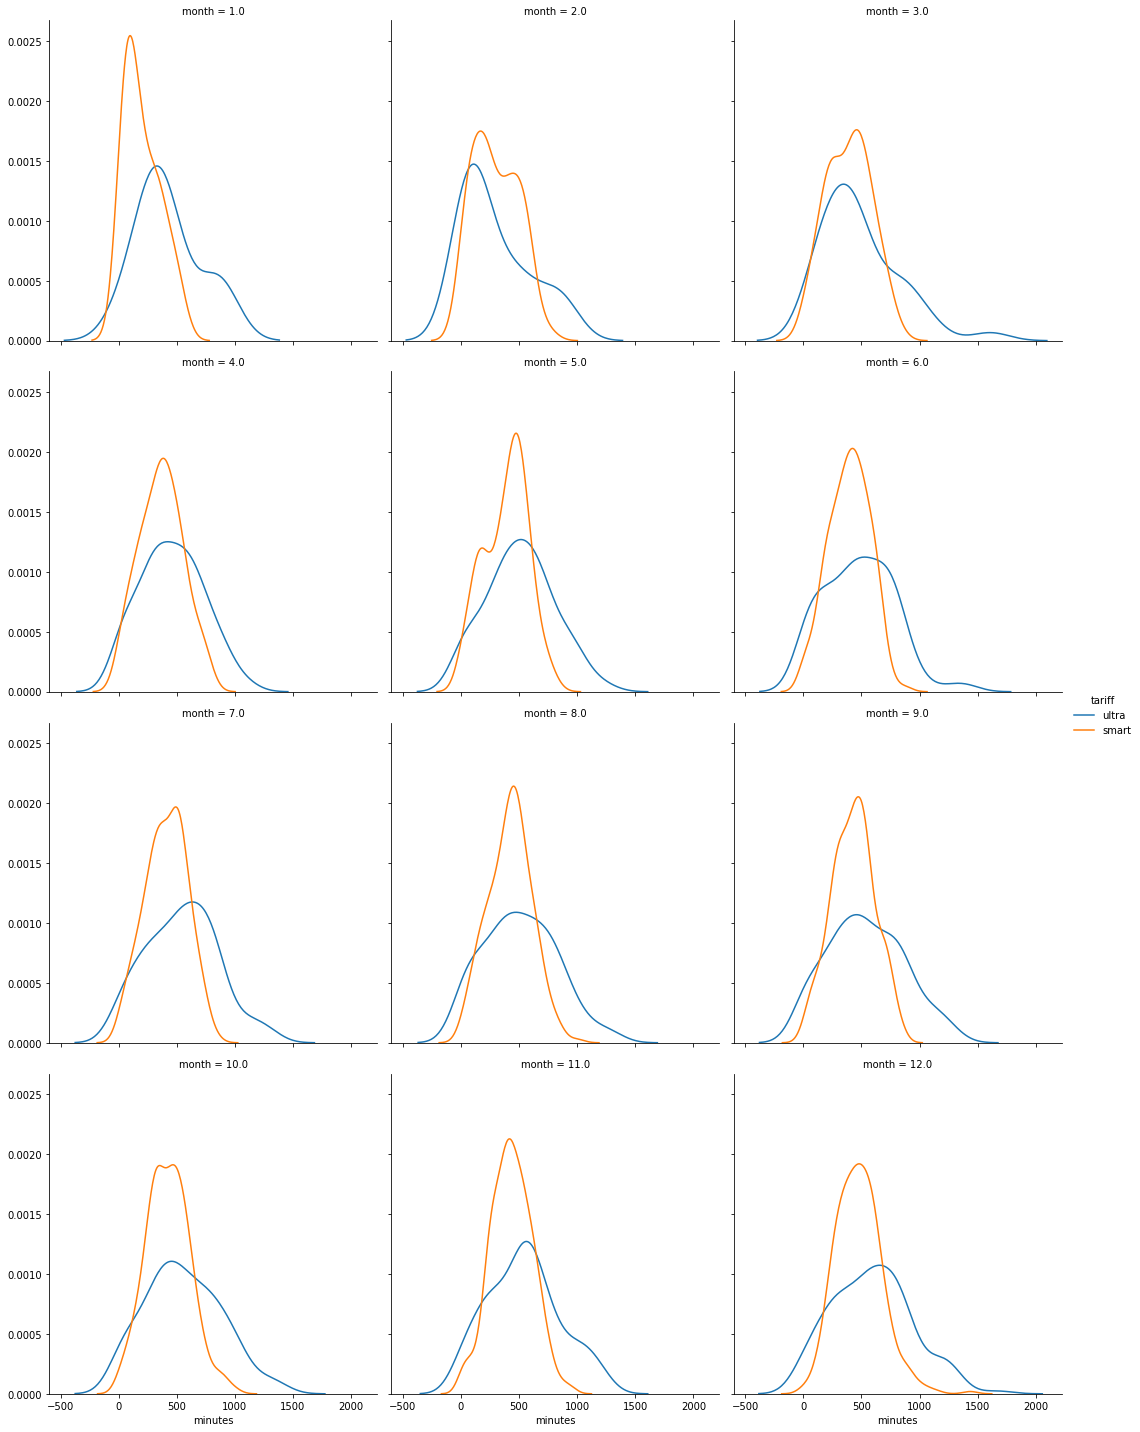

In [59]:
g = sns.FacetGrid(users_paid_monthly, col = 'month', col_wrap=3, hue= 'tariff', height=5)
_ = g.map(sns.kdeplot, "minutes")
_ = g.add_legend()

Считаю процент пользователей вышедших за лимит

In [60]:
norms = users_paid_monthly[users_paid_monthly['tariff'] == 'smart']['minutes'].value_counts(normalize=True).reset_index()
users_tariff_limits_overwhelm.loc['smart','calls'] = norms[norms['index'] > 500]['minutes'].sum()

In [61]:
norms = users_paid_monthly[users_paid_monthly['tariff'] == 'ultra']['minutes'].value_counts(normalize=True).reset_index()
users_tariff_limits_overwhelm.loc['ultra','calls'] = norms[norms['index'] > 3000]['minutes'].sum()

In [62]:
users_tariff_limits_overwhelm

,calls,traffic,messages
smart,0.338117,0,0
ultra,0.000000,0,0


In [63]:
tariffs_data

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Распределения близки к нормальному.

Пользователей тарифа смарт имеют среднее время разговора в 400 минут, 33% пользователей переходит за границу в 500 минут.

Пользователи тарифа ультра имют среднее время разговора в 550 минут, никто не выходит за границу 3000 минут разговора.

### Интернет траффик

In [64]:
users_paid_monthly['gb_used'] = np.ceil(np.true_divide(users_paid_monthly['mb_used'], 1024))

In [65]:
_,_,m,var,_,_= st.describe(users_paid_monthly[users_paid_monthly['tariff'] == 'smart']['gb_used'])
print(f'Mean {m}, Variance {var**(1/2):.3f}')

Mean 16.32152466367713, Variance 5.756


In [66]:
_,_,m,var,_,_= st.describe(users_paid_monthly[users_paid_monthly['tariff'] == 'ultra']['gb_used'])
print(f'Mean {m}, Variance {var**(1/2):.3f}')

Mean 19.474645030425965, Variance 9.868


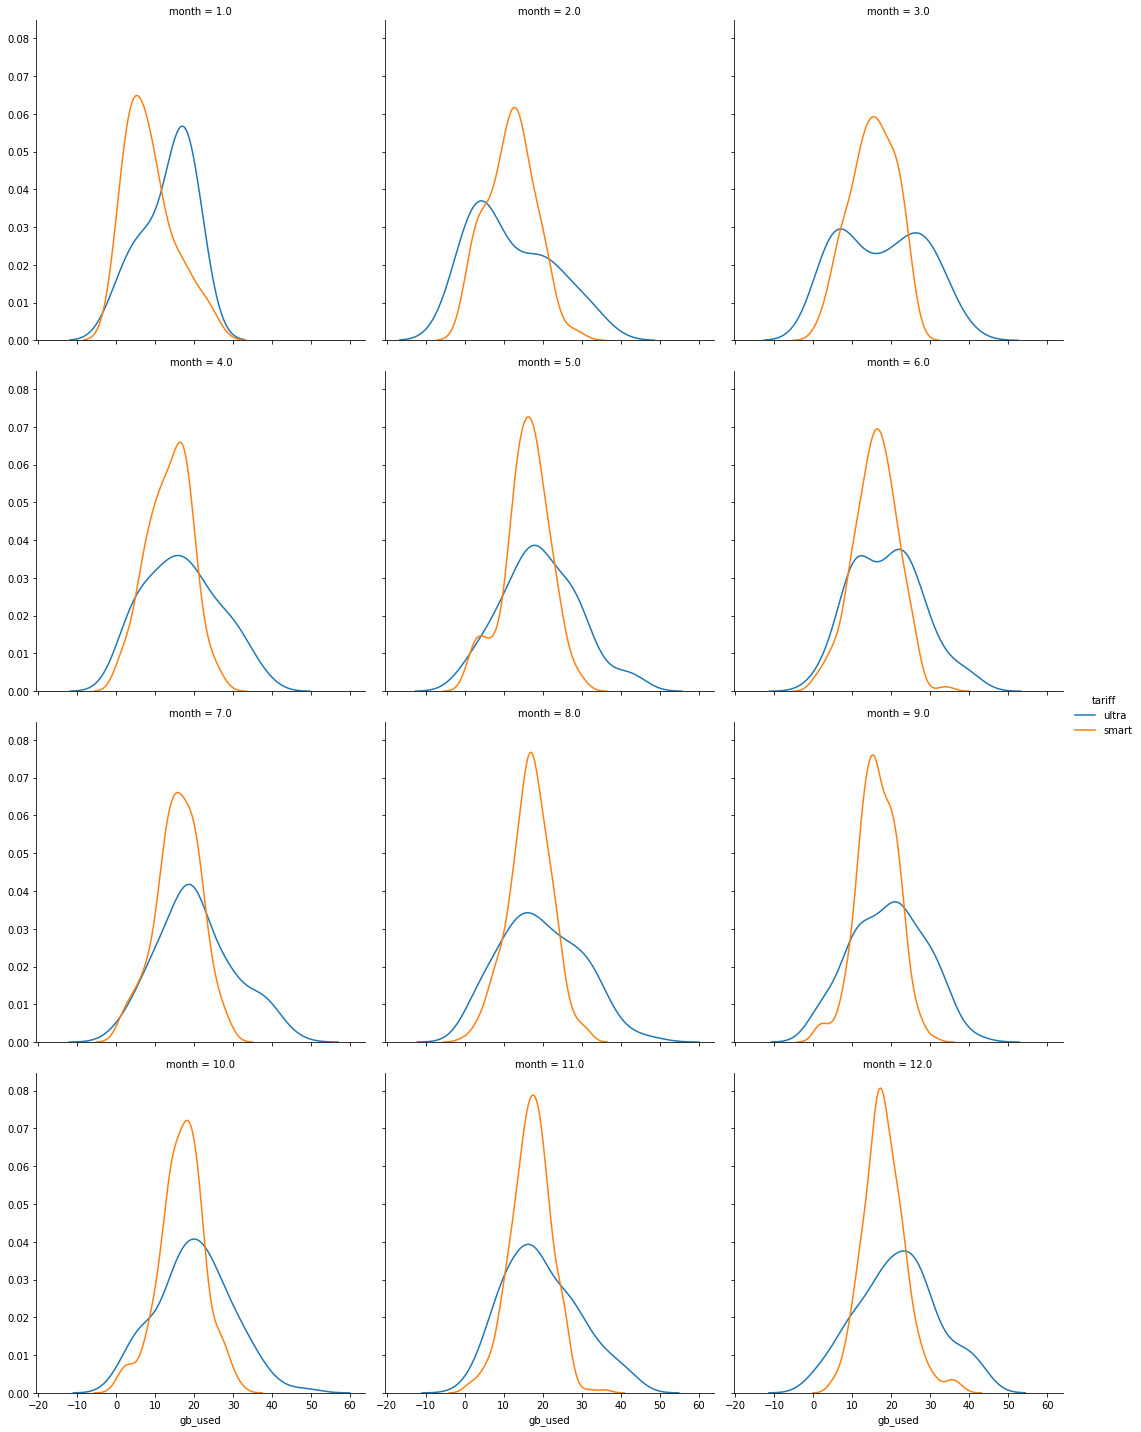

In [67]:
g = sns.FacetGrid(users_paid_monthly, col = 'month', col_wrap=3, hue= 'tariff', height=5)
_ = g.map(sns.kdeplot, "gb_used")
_ = g.add_legend()

In [68]:
norms = users_paid_monthly[users_paid_monthly['tariff'] == 'smart']['gb_used'].value_counts(normalize=True).reset_index()
users_tariff_limits_overwhelm.loc['smart','traffic'] = norms[norms['index'] > 15]['gb_used'].sum()

In [69]:
norms = users_paid_monthly[users_paid_monthly['tariff'] == 'ultra']['gb_used'].value_counts(normalize=True).reset_index()
users_tariff_limits_overwhelm.loc['ultra','traffic']  = norms[norms['index'] > 30]['gb_used'].sum()

In [70]:
users_tariff_limits_overwhelm

,calls,traffic,messages
smart,0.338117,0.584753,0
ultra,0.000000,0.135903,0


In [71]:
tariffs_data

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Распределения близки к нормальному.

Пользователи тарифа смарт в среднем потребляют 16гю трафика и имеют дисперсию в 10гб. В среднем 58% пользователей превышают лимит в 15гб, при среднем потреблении в 16гб трафика.

Пользователи ультра в среднем потребляют 19гб трафика и имеют в два раза большую дисперсию в 10гб. В среднем 13% пользователей ультра превышают лимит в 30гб.

В 5, 6, 9, 12 месяц, графики распределения трафика имеют 2 точки экстремума, возможно пользователей тарифа ультра можно разделить на 2 различные группы по потребностям в трафике. 

### Смс сообщения

In [72]:
_,_,m,var,_,_= st.describe(users_paid_monthly[users_paid_monthly['tariff'] == 'smart']['messages_count'])
print(f'Mean {m}, Variance {var**(1/2):.3f}')

Mean 33.36905829596412, Variance 28.230


In [73]:
_,_,m,var,_,_= st.describe(users_paid_monthly[users_paid_monthly['tariff'] == 'ultra']['messages_count'])
print(f'Mean {m}, Variance {var**(1/2):.3f}')

Mean 49.31338742393509, Variance 47.806


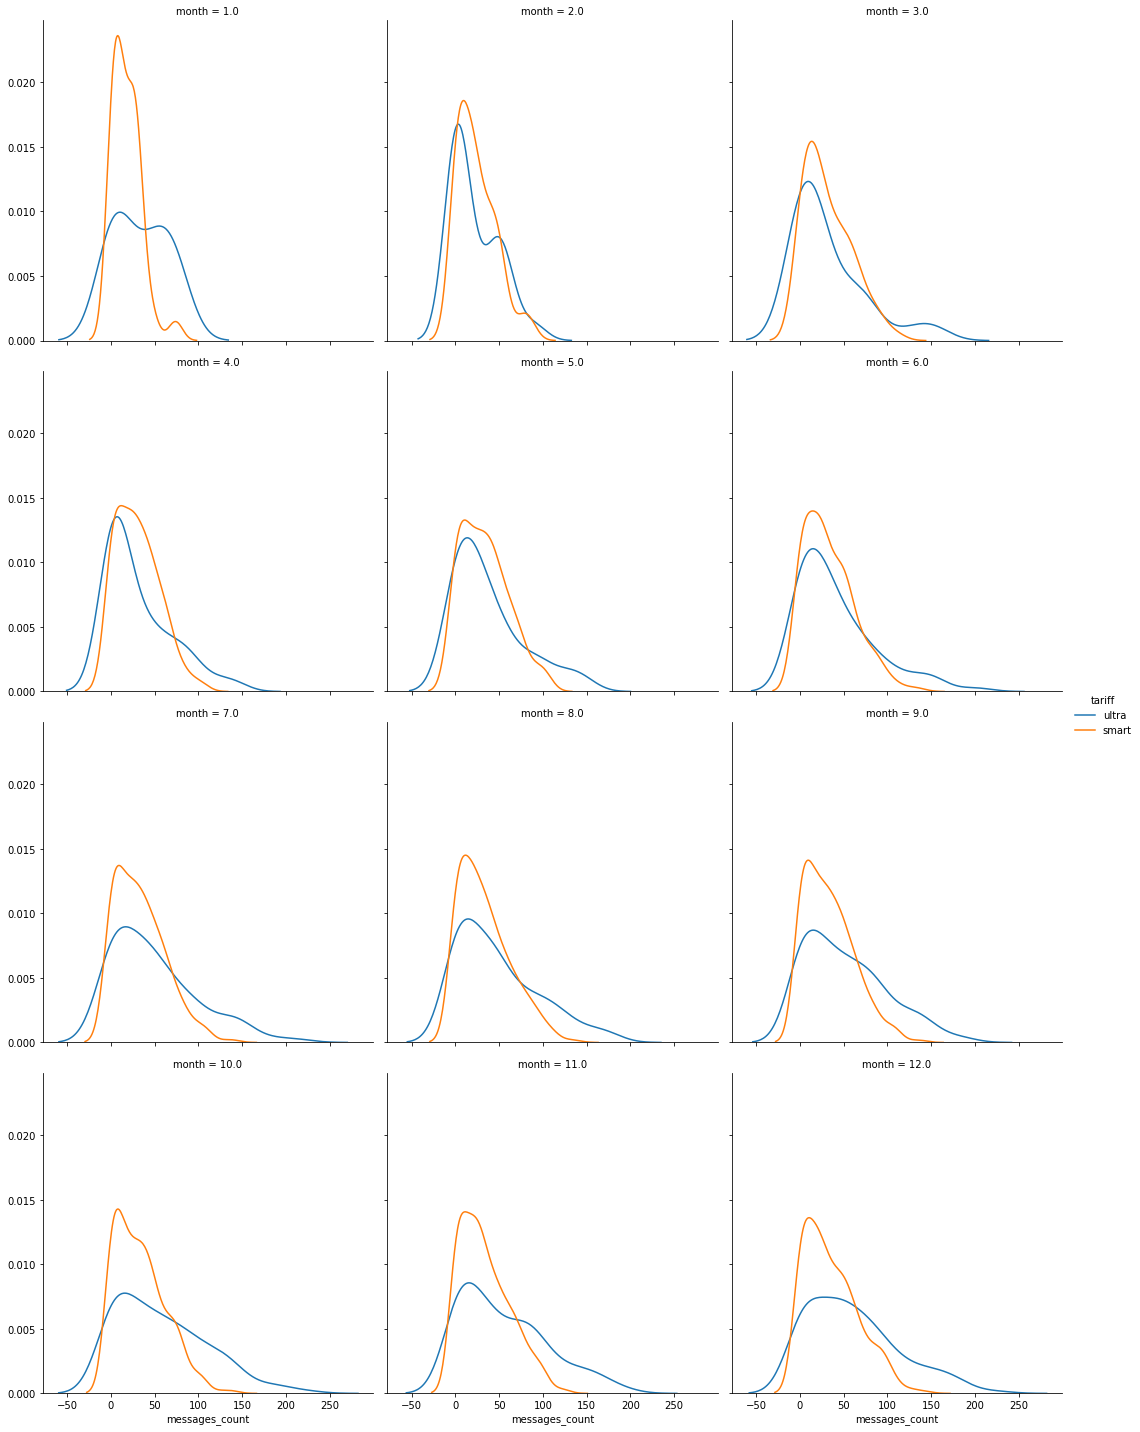

In [74]:
g = sns.FacetGrid(users_paid_monthly, col = 'month', col_wrap=3, hue= 'tariff', height=5)
_ = g.map(sns.kdeplot, "messages_count")
_ = g.add_legend()

In [75]:
norms = users_paid_monthly[users_paid_monthly['tariff'] == 'smart']['messages_count'].value_counts(normalize=True).reset_index()
users_tariff_limits_overwhelm.loc['smart','messages'] = norms[norms['index'] > 50]['messages_count'].sum()

In [76]:
norms = users_paid_monthly[users_paid_monthly['tariff'] == 'ultra']['messages_count'].value_counts(normalize=True).reset_index()
users_tariff_limits_overwhelm.loc['ultra','messages'] = norms[norms['index'] > 1000]['messages_count'].sum()

In [77]:
users_tariff_limits_overwhelm

,calls,traffic,messages
smart,0.338117,0.584753,0.252915
ultra,0.000000,0.135903,0.000000


In [78]:
tariffs_data

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Распределения близки к нормальному

На графиках распределение видно как среднее число сообщений у пользователей тарифа смарт смещается в сторону ограничения в 50 сообщений. В среднем 25% пользователей смарт превышают лимит в 50 сообщений.

У пользователей ультра такого смещения нет и значения больше соответсвуют естественным потребностям пользователей, никто из пользователей ультра не превышает лимита.

## Гипотезы

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Предпологаю что у тарифа смарт и ультра различные дисперсии. В тарифе смарт проще превысить ограничения по рессурсам. Т.к. дисперсия возникает в результате, таких превышений, дисперсия тарифа ультра должна быть меньше чем у тарифа смарт. Также выборки разного размера.

In [79]:
users_paid_monthly['tariff'].value_counts()

smart    2230
ultra     986
Name: tariff, dtype: int64

In [80]:
users_paid_monthly[users_paid_monthly['tariff'] == 'smart']['paid'].mean()

1289.6417040358745

In [81]:
users_paid_monthly[users_paid_monthly['tariff'] == 'ultra']['paid'].mean()

2070.030425963489

H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются. H1 - средняя выручка отличается отличается. Альфа 10%

In [82]:
alpha = 0.1
a1 = users_paid_monthly[users_paid_monthly['tariff'] == 'smart']['paid'].values
a2 = users_paid_monthly[users_paid_monthly['tariff'] == 'ultra']['paid'].values
test_res = st.ttest_ind(a1, a2,equal_var = False)

print('p-value',test_res.pvalue)

if test_res.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value 1.927011394420941e-250
Отвергаем нулевую гипотезу


Вероятность случайного получения таких выборочных средних как наши равна 1.0280667202187211e-244, согласно p-value. Следовательно мы отвергаем нулевую гипотезу и предпологаем что средняя выручка пользователей тарифа ультра значительно больше.

Для меня это вполне логично, у тарифов разная целевая аудитория с разным изначальным вектором поведения. Один тариф имеет своей целью экономить, другой иметь запас по рессурсу и стабильную плату в месяц. Ограничения тарифов конечно сглаживают эту разницу. Но если сглаживать ее настолько что средняя выручка станет одинаковой, то какой смысл иметь 2 разных тарифа, то же верно и для среднего пользователя тарифа, он не увидит разницы.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Предполагаю что у совокупностей разная дисперсия т.к Москва и солянка из остальных городов отличаются уже хотя бы предпочтением к тарифам. Также выборки разных размеров.

In [83]:
users_paid_monthly['msk'] = users_paid_monthly['city'] == 'Москва'
users_paid_monthly.pivot_table(index='msk',columns='tariff', values='user_id', aggfunc='count')

tariff,smart,ultra
msk,,
False,1844,761
True,386,225


In [84]:
users_paid_monthly[users_paid_monthly['msk'] == True]['paid'].mean()

1546.7135842880523

In [85]:
users_paid_monthly[users_paid_monthly['msk'] == False]['paid'].mean()

1524.7251439539348

H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. H1 - средняя выручка отличается. Альфа 10%

In [86]:
alpha = 0.1
a1 = users_paid_monthly[users_paid_monthly['msk'] == True]['paid'].values
a2 = users_paid_monthly[users_paid_monthly['msk'] == False]['paid'].values
test_res = st.ttest_ind(a1, a2,equal_var = False)

print('p-value',test_res.pvalue)

if test_res.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value 0.5216952110000278
Не получилось отвергнуть нулевую гипотезу


Вероятность случайно получить такие средние как у нас 44%, отвергнуть нулевую гипотезу не получается из за не репрезентативности нашей выборки в отношении средней выручки в мск и регионах. Отвергнуть нулевую гипотезу по этой выборке нельзя.

Одинаковые средние показатели выручки для реигонов и мск для меня не логичны. Пользователи регионов и столицы отличаются моделью поведения в отношении интернет трафика и общения. Так же в предпочтении одного тарифа другому. Хотя значительной разницы в пользовании тарифами на графиках нет. Видно что пользователи тарифа ультра из Москвы чаще превышают лимиты этого тарифа. Возможно среди них есть потребность в более расширенном тарифе.

In [87]:
users_paid_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3216 non-null   int64         
 1   age             3216 non-null   int64         
 2   churn_date      189 non-null    object        
 3   city            3216 non-null   object        
 4   first_name      3216 non-null   object        
 5   last_name       3216 non-null   object        
 6   reg_date        3216 non-null   datetime64[ns]
 7   tariff          3216 non-null   object        
 8   month           3214 non-null   float64       
 9   minutes         3216 non-null   float64       
 10  calls_count     3216 non-null   float64       
 11  mb_used         3216 non-null   float64       
 12  messages_count  3216 non-null   float64       
 13  paid            3216 non-null   int64         
 14  gb_used         3216 non-null   float64       
 15  msk 

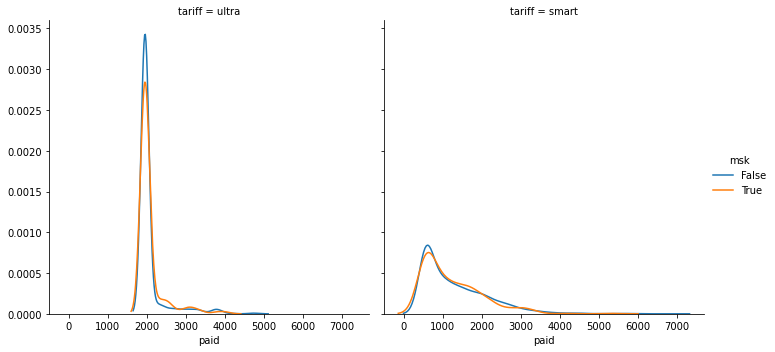

In [88]:
g = sns.FacetGrid(users_paid_monthly, col = 'tariff', hue= 'msk', height=5)
_ = g.map(sns.kdeplot, 'paid')
_ = g.add_legend()

## Вывод

In [89]:
users_paid_monthly[users_paid_monthly['tariff'] == 'smart']['paid'].sum()

2875901

In [90]:
users_paid_monthly[users_paid_monthly['tariff'] == 'smart']['paid'].count()

2230

In [91]:
users_paid_monthly[users_paid_monthly['tariff'] == 'ultra']['paid'].sum()

2041050

In [92]:
users_paid_monthly[users_paid_monthly['tariff'] == 'ultra']['paid'].count()

986

В среднем пользователь тарифа ультра приносит 2100р, пользователь тарифа смарт 1200р. 

Годовая выручка с тарифа ультра 1969500 при 951 пользователе тарифа.

Годовая выручка с тарифа смарт 2869651 при 2223 пользователе тарифа.

Гипотезы:

    Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, гипотеза подтвердилась, выручка пользователей ультра почти в 2 раза больше.
    
    Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов: гипотеза не подтвердилась, согласно имеющейся выборке вероятность получить такое распределение средних как у нас, случайно, превышает 44%, по этому отвергнуть нулевую гипотезу о равенстве средних не получается.
    
Средние показатели пользователей смарт:

    Cреднее время разговора 400 минут, 33% пользователей переходит за границу тарифа в 500 минут.

    Среднее потребление трафика 16гб, дисперсия в 10гб. В среднем 58% пользователей превышают лимит в 15гб.
    
    На графиках распределение видно как среднее число сообщений смещается в сторону ограничения в 50 сообщений. В среднем 25% пользователей смарт превышают лимит в 50 сообщений.
    
Средние показатели пользователей ультра:
    
    Среднее время разговора 550 минут, никто не выходит за границу 3000 минут разговора.

    Среднее потребление трафика 19гб и в два раза большую дисперсию в 10гб. В среднем 13% пользователей превышают лимит в 30гб.

    У пользователей ультра смещения в сторону ограничения по сообщениям нет и значения больше соответсвуют естественным потребностям пользователей, никто из пользователей ультра не превышает лимита.

Наблюдения: 
    
    В ходе исследования обнаружилось что среди пользователей тарифа ультра, можно выделить большую группу пользователей с потребностями отличающимися от других, на графиках потребления трафика в некоторые месяцы видно что распределение пользователей ультра делится на два, с 2мя центрами.
    
Рекомендация:
    
    Расширить лимиты в тарифе смарт в первую очередь по сообщениям, если будет наблюдатся отток пользователей тарифа смарт, как на выборке.